# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
api_key = weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
new_lats = []
new_longs = []



# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        new_lats.append(lat_lng[0])
        new_longs.append(lat_lng[1])

# Print the city count to confirm sufficient count
print(len(cities))


608


In [3]:
#use citipy to find cities using coordinates
#come up with new df that will work in conjunction with the weather

weather_df = pd.DataFrame({"lat":new_lats, "long":new_longs, "city":cities})
weather_df

,lat,long,city
0,60.790170,124.477820,nizhniy kuranakh
1,38.624533,142.923618,kamaishi
2,-23.071122,-104.179514,puerto ayora
3,4.026910,154.583131,kavieng
4,-19.564388,67.866449,grand river south east
...,...,...,...
603,44.639053,114.550957,baruun-urt
604,34.637024,-106.472646,belen
605,-43.030430,-32.221453,laguna
606,-2.876367,106.024382,mentok


In [4]:
weather_df.head()

,lat,long,city
0,60.790170,124.477820,nizhniy kuranakh
1,38.624533,142.923618,kamaishi
2,-23.071122,-104.179514,puerto ayora
3,4.026910,154.583131,kavieng
4,-19.564388,67.866449,grand river south east


In [5]:
weather_df.tail()

,lat,long,city
603,44.639053,114.550957,baruun-urt
604,34.637024,-106.472646,belen
605,-43.030430,-32.221453,laguna
606,-2.876367,106.024382,mentok
607,34.688053,136.059822,nabari


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Lists for the loop function to append to
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#  counter 
counter = 1

# Log file print statement
print(f"Start data extract!")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_counter = response["name"]
        print(f"Processing Record {counter} | {city_counter}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        counter += 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Start data extract!
-------------------------------
Processing Record 1 | Nizhniy Kuranakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=nizhniy kuranakh
Processing Record 2 | Kamaishi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=kamaishi
Processing Record 3 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=puerto ayora
Processing Record 4 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=kavieng
City not found. Skipping...
City not found. Skipping...
Processing Record 5 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=ribeira grande
Processing Record 6 | Huarmey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=huarmey
Pr

City not found. Skipping...
Processing Record 57 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=albany
Processing Record 58 | Trelew
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=trelew
Processing Record 59 | Thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=thompson
Processing Record 60 | Cabo San Lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=cabo san lucas
Processing Record 61 | Amapá
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=amapa
Processing Record 62 | Ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=ilulissat
Processing Record 63 | Coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cb

Processing Record 112 | Westport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=westport
Processing Record 113 | Luang Prabang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=luang prabang
Processing Record 114 | Camaná
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=camana
Processing Record 115 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=hasaki
Processing Record 116 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=saint-philippe
Processing Record 117 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=cape town
Processing Record 118 | Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c

Processing Record 167 | Shagonar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=shagonar
City not found. Skipping...
Processing Record 168 | Jaisinghnagar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=jaisinghnagar
Processing Record 169 | Richards Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=richards bay
Processing Record 170 | Chui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=chuy
City not found. Skipping...
Processing Record 171 | Nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=nome
Processing Record 172 | Chipinge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=chipinge
Processing Record 173 | Labuhan
http://api.openweathermap.org/data/2.5/w

Processing Record 223 | Souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=souillac
Processing Record 224 | Eyl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=eyl
City not found. Skipping...
Processing Record 225 | Florø
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=floro
Processing Record 226 | Belmonte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=belmonte
Processing Record 227 | Dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=dikson
Processing Record 228 | Tateyama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=tateyama
Processing Record 229 | Lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbae

Processing Record 278 | Henties Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=henties bay
City not found. Skipping...
Processing Record 279 | Indian Head
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=indian head
Processing Record 280 | Cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=cayenne
Processing Record 281 | Rosarito
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=rosarito
Processing Record 282 | Nelson Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=nelson bay
Processing Record 283 | Hongjiang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=hongjiang
City not found. Skipping...
Processing Record 284 | Myanaung
http://api.openweathermap

Processing Record 333 | Champawat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=champawat
Processing Record 334 | Lovozero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=lovozero
Processing Record 335 | Egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=egvekinot
City not found. Skipping...
Processing Record 336 | Maragogi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=maragogi
Processing Record 337 | Atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=atar
Processing Record 338 | Vizinga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=vizinga
Processing Record 339 | Rafaela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cb

Processing Record 388 | Mitú
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=mitu
Processing Record 389 | Udachny
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=udachnyy
Processing Record 390 | Warrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=warrington
Processing Record 391 | Seoul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=seoul
Processing Record 392 | Westerland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=westerland
Processing Record 393 | Rabat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=rabat
Processing Record 394 | Dezful
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=dezful
Pr

Processing Record 444 | Palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=palmer
Processing Record 445 | Pareora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=pareora
Processing Record 446 | Kautokeino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=kautokeino
Processing Record 447 | Mayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=mayo
Processing Record 448 | Umluj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=umm lajj
Processing Record 449 | Tuy Hoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=tuy hoa
Processing Record 450 | Buchanan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=buchanan


Processing Record 500 | Poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=poum
Processing Record 501 | Nicoya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=nicoya
Processing Record 502 | Pemangkat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=pemangkat
Processing Record 503 | Rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=rocha
Processing Record 504 | Dire Dawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=dire dawa
Processing Record 505 | Amahai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=amahai
Processing Record 506 | Elban
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1cc8b2cba1c9c82d5b40cbaebf4b290c&q=elban
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create a dictonary with the lists generated
city_data_weather = {
    "City": city_name,
    "Country":country,
    "Date":date, 
    "Cloudiness":cloudiness, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed}

# Create a data frame from dictionary
weather_df2 = pd.DataFrame(city_data_weather)

# Display count of weather data values 
weather_df2.count()

City          555
Country       555
Date          555
Cloudiness    555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

In [9]:
#save into .csv format

weather_df2.to_csv('../output_data//weather_df2.csv')
weather_df2

,City,Country,Date,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nizhniy Kuranakh,RU,1635003722,97,90,58.8353,125.4869,32.72,5.17
1,Kamaishi,JP,1635003724,3,72,39.2667,141.8833,45.27,5.57
2,Puerto Ayora,EC,1635003725,94,78,-0.7393,-90.3518,69.76,9.15
3,Kavieng,PG,1635003726,66,77,-2.5744,150.7967,82.29,15.84
4,Ribeira Grande,PT,1635003728,20,60,38.5167,-28.7000,72.00,10.36
...,...,...,...,...,...,...,...,...,...
550,Garoowe,SO,1635004227,4,30,8.4054,48.4845,86.45,7.70
551,Baruun-Urt,MN,1635004501,99,42,46.6806,113.2792,36.50,8.12
552,Belen,TR,1635004503,0,42,36.4891,36.2233,62.53,5.26
553,Laguna,US,1635004505,1,91,38.4210,-121.4238,57.25,3.00


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%. used the .reset_index function so that it can be turned 
# into a column
clean_city_data_df = weather_df2[(weather_df2["Humidity"] <=100)]
clean_city_data_df = weather_df2.reset_index(drop=True)
clean_city_data_df

,City,Country,Date,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nizhniy Kuranakh,RU,1635003722,97,90,58.8353,125.4869,32.72,5.17
1,Kamaishi,JP,1635003724,3,72,39.2667,141.8833,45.27,5.57
2,Puerto Ayora,EC,1635003725,94,78,-0.7393,-90.3518,69.76,9.15
3,Kavieng,PG,1635003726,66,77,-2.5744,150.7967,82.29,15.84
4,Ribeira Grande,PT,1635003728,20,60,38.5167,-28.7000,72.00,10.36
...,...,...,...,...,...,...,...,...,...
550,Garoowe,SO,1635004227,4,30,8.4054,48.4845,86.45,7.70
551,Baruun-Urt,MN,1635004501,99,42,46.6806,113.2792,36.50,8.12
552,Belen,TR,1635004503,0,42,36.4891,36.2233,62.53,5.26
553,Laguna,US,1635004505,1,91,38.4210,-121.4238,57.25,3.00


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df.to_csv('weather_df_data.csv', index=False )

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

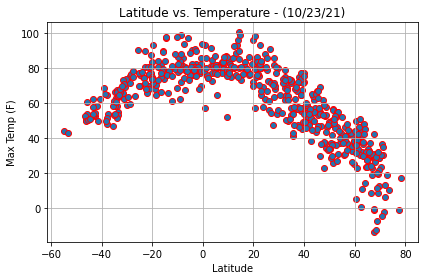

In [12]:
plt.scatter(clean_city_data_df["Lat"], clean_city_data_df["Max Temp"], alpha=1.0, edgecolor='red')
plt.title(f"Latitude vs. Temperature - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)
plt.tight_layout()
plt.savefig("../output_data/LatvTemp.png")

plt.show()

## Latitude vs. Humidity Plot

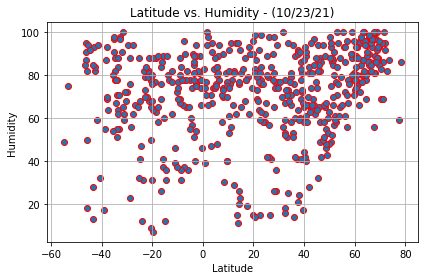

In [13]:
plt.scatter(clean_city_data_df["Lat"], clean_city_data_df["Humidity"], alpha=1.0, edgecolor='red')
plt.title(f"Latitude vs. Humidity - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.tight_layout()
plt.savefig("../output_data/LatvHumid.png")

plt.show()

## Latitude vs. Cloudiness Plot

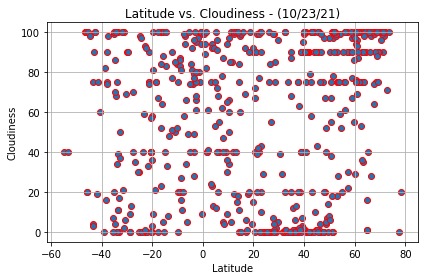

In [14]:
plt.scatter(clean_city_data_df["Lat"], clean_city_data_df["Cloudiness"], alpha=1.0, edgecolor='red')
plt.title(f"Latitude vs. Cloudiness - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.tight_layout()
plt.savefig("../output_data/LatvCloud.png")

plt.show()

## Latitude vs. Wind Speed Plot

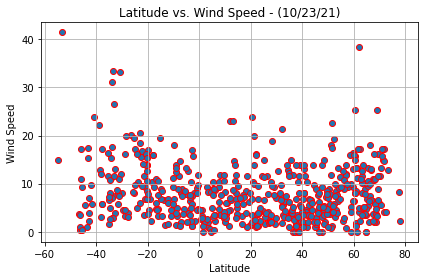

In [15]:
plt.scatter(clean_city_data_df["Lat"], clean_city_data_df["Wind Speed"], alpha=1.0, edgecolor='red')
plt.title(f"Latitude vs. Wind Speed - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.tight_layout()
plt.savefig("../output_data/LatvWindSpeed.png")

plt.show()

## Linear Regression

In [16]:
#above the equator
north_hemi_df = clean_city_data_df.loc[pd.to_numeric(clean_city_data_df["Lat"]).astype(float) > 0, :]
#belowthe equator
south_hemi_df = clean_city_data_df.loc[pd.to_numeric(clean_city_data_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

line equation is:y = -0.9768x +93.8456
r2-value is: -0.8770429154640537
Data displays a negative slope suggesting a negative correlation!
Moving away from equator suggests temperature decreases!


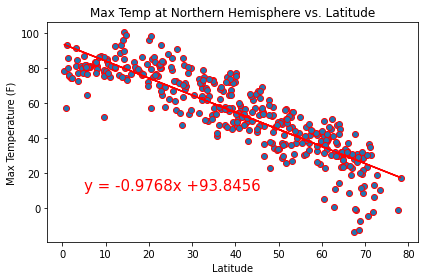

In [39]:
# establish x and y parameters and create regression function
x_val = pd.to_numeric(north_hemi_df["Lat"]).astype(float)
y_val = pd.to_numeric(north_hemi_df["Max Temp"]).astype(float)
(slope, intercept, r_value, p_value, stdev) = linregress(x_val, y_val)
regression = x_val*slope+intercept
regression_equation = "y = " +str(round(slope,4)) +"x +" +str(round(intercept, 4))
#create scatter plot
plt.scatter(x_val, y_val, alpha=1.0, edgecolor='red')
plt.plot(x_val, regression, "r-")
plt.annotate(regression_equation, (5,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temp at Northern Hemisphere vs. Latitude")
#output
print(f"line equation is:{regression_equation}")
print(f"r2-value is: {r_value}")
print("Data displays a negative slope suggesting a negative correlation!")
print("Moving away from equator suggests temperature decreases!")
plt.tight_layout()
plt.savefig("../output_data/North_Hemi_Max_Temp_v_Lat_Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

line equation is:y = 0.6969x +87.0844
r2-value is: 0.7774087517129663
Data displays a positive slope suggesting a positive correlation!
Moving towards the equator suggests temperature will increase!


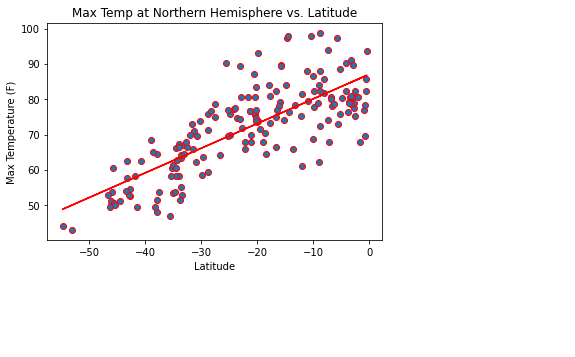

In [30]:
# establish x and y parameters and create regression function
x_val = pd.to_numeric(south_hemi_df["Lat"]).astype(float)
y_val = pd.to_numeric(south_hemi_df["Max Temp"]).astype(float)
(slope, intercept, r_value, p_value, stdev) = linregress(x_val, y_val)
regression = x_val*slope+intercept
regression_equation = "y = " +str(round(slope,4)) +"x +" +str(round(intercept, 4))
#create scatter plot
plt.scatter(x_val, y_val, alpha=1.0, edgecolor='red')
plt.plot(x_val, regression, "r-")
plt.annotate(regression_equation, (5,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temp at Northern Hemisphere vs. Latitude")
#output
print(f"line equation is:{regression_equation}")
print(f"r2-value is: {r_value}")
print("Data displays a positive slope suggesting a positive correlation!")
print("Moving towards the equator suggests temperature will increase!")
plt.savefig("../output_data/South_Hemi_Max_Temp_v_Lat_Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

line equation is:y = 0.2689x +62.9831
r2-value is: 0.27785338494646805
Data displays a positive slope. However, difficult to determine a trend, especially after observing r2-value result!


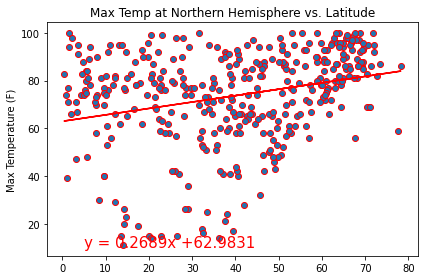

In [31]:
# establish x and y parameters and create regression function
x_val = pd.to_numeric(north_hemi_df["Lat"]).astype(float)
y_val = pd.to_numeric(north_hemi_df["Humidity"]).astype(float)
(slope, intercept, r_value, p_value, stdev) = linregress(x_val, y_val)
regression = x_val*slope+intercept
regression_equation = "y = " +str(round(slope,4)) +"x +" +str(round(intercept, 4))
#create scatter plot
plt.scatter(x_val, y_val, alpha=1.0, edgecolor='red')
plt.plot(x_val, regression, "r-")
plt.annotate(regression_equation, (5,10), fontsize=15, color="red")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temp at Northern Hemisphere vs. Latitude")
#output
print(f"line equation is:{regression_equation}")
print(f"r2-value is: {r_value}")
print("Data displays a positive slope. However, difficult to determine a trend, especially after observing r2-value result!")
plt.tight_layout()
plt.savefig("../output_data/North_Hemi_Humidity_v_Lat_Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

line equation is:y = -0.0416x +67.6978
r2-value is: -0.027087365472775543
Data displays a positive slope. However, difficult to determine a trend, especially after observing r2-value result!


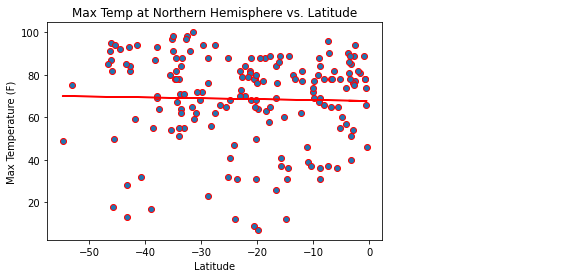

In [32]:
# establish x and y parameters and create regression function
x_val = pd.to_numeric(south_hemi_df["Lat"]).astype(float)
y_val = pd.to_numeric(south_hemi_df["Humidity"]).astype(float)
(slope, intercept, r_value, p_value, stdev) = linregress(x_val, y_val)
regression = x_val*slope+intercept
regression_equation = "y = " +str(round(slope,4)) +"x +" +str(round(intercept, 4))
#create scatter plot
plt.scatter(x_val, y_val, alpha=1.0, edgecolor='red')
plt.plot(x_val, regression, "r-")
plt.annotate(regression_equation, (5,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temp at Northern Hemisphere vs. Latitude")
#output
print(f"line equation is:{regression_equation}")
print(f"r2-value is: {r_value}")
print("Data displays a positive slope. However, difficult to determine a trend, especially after observing r2-value result!")
plt.savefig("../output_data/South_Hemi_Max_Temp_v_Lat_Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

line equation is:y = 0.5487x +35.9319
r2-value is: 0.28504668560648255
Data displays a positive slope. However, difficult to determine a trend, especially after observing r2-value result!


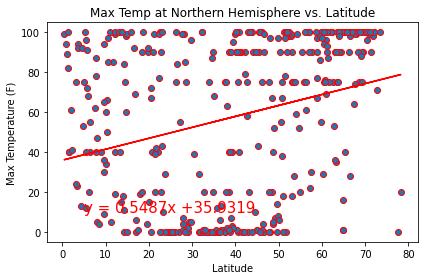

In [33]:
# establish x and y parameters and create regression function
x_val = pd.to_numeric(north_hemi_df["Lat"]).astype(float)
y_val = pd.to_numeric(north_hemi_df["Cloudiness"]).astype(float)
(slope, intercept, r_value, p_value, stdev) = linregress(x_val, y_val)
regression = x_val*slope+intercept
regression_equation = "y = " +str(round(slope,4)) +"x +" +str(round(intercept, 4))
#create scatter plot
plt.scatter(x_val, y_val, alpha=1.0, edgecolor='red')
plt.plot(x_val, regression, "r-")
plt.annotate(regression_equation, (5,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temp at Northern Hemisphere vs. Latitude")
#output
print(f"line equation is:{regression_equation}")
print(f"r2-value is: {r_value}")
print("Data displays a positive slope. However, difficult to determine a trend, especially after observing r2-value result!")
plt.tight_layout()
plt.savefig("../output_data/North_Hemi_Max_Cloudiness_v_Lat_Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

line equation is:y = 0.2791x +61.788
r2-value is: 0.10742845484258826
Data displays a positive slope. However, difficult to determine a trend, especially after observing r2-value result!


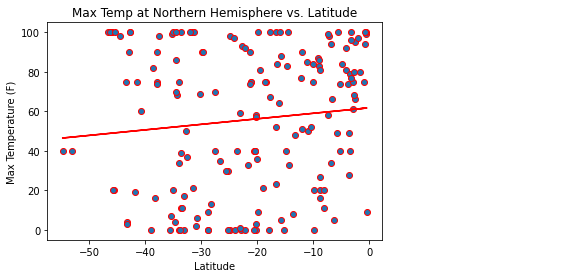

In [34]:
# establish x and y parameters and create regression function
x_val = pd.to_numeric(south_hemi_df["Lat"]).astype(float)
y_val = pd.to_numeric(south_hemi_df["Cloudiness"]).astype(float)
(slope, intercept, r_value, p_value, stdev) = linregress(x_val, y_val)
regression = x_val*slope+intercept
regression_equation = "y = " +str(round(slope,4)) +"x +" +str(round(intercept, 4))
#create scatter plot
plt.scatter(x_val, y_val, alpha=1.0, edgecolor='red')
plt.plot(x_val, regression, "r-")
plt.annotate(regression_equation, (5,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temp at Northern Hemisphere vs. Latitude")
#output
print(f"line equation is:{regression_equation}")
print(f"r2-value is: {r_value}")
print("Data displays a positive slope. However, difficult to determine a trend, especially after observing r2-value result!")
plt.savefig("../output_data/South_Hemi_Cloudiness_v_Lat_Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

line equation is:y = 0.0505x +5.0629
r2-value is: 0.19786641415272796
Data displays a positive slope. However, difficult to determine a trend, especially after observing r2-value result!


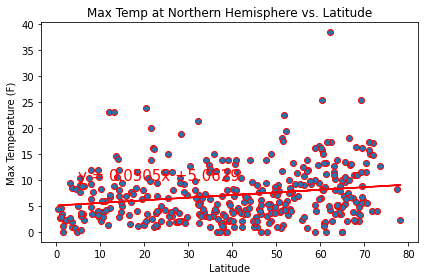

In [35]:
# establish x and y parameters and create regression function
x_val = pd.to_numeric(north_hemi_df["Lat"]).astype(float)
y_val = pd.to_numeric(north_hemi_df["Wind Speed"]).astype(float)
(slope, intercept, r_value, p_value, stdev) = linregress(x_val, y_val)
regression = x_val*slope+intercept
regression_equation = "y = " +str(round(slope,4)) +"x +" +str(round(intercept, 4))
#create scatter plot
plt.scatter(x_val, y_val, alpha=1.0, edgecolor='red')
plt.plot(x_val, regression, "r-")
plt.annotate(regression_equation, (5,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temp at Northern Hemisphere vs. Latitude")
#output
print(f"line equation is:{regression_equation}")
print(f"r2-value is: {r_value}")
print("Data displays a positive slope. However, difficult to determine a trend, especially after observing r2-value result!")
plt.tight_layout()
plt.savefig("../output_data/North_Hemi_WindSpeed_v_Lat_Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

line equation is:y = 0.2791x +61.788
r2-value is: 0.10742845484258826
Data displays a positive slope. However, difficult to determine a trend, especially after observing r2-value result!


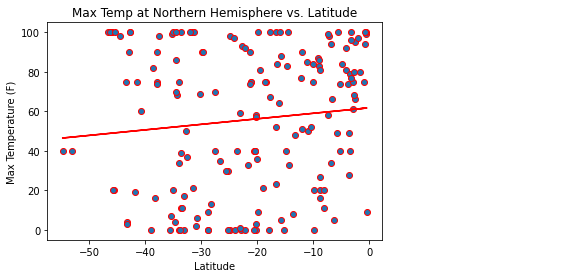

In [36]:
# establish x and y parameters and create regression function
x_val = pd.to_numeric(south_hemi_df["Lat"]).astype(float)
y_val = pd.to_numeric(south_hemi_df["Cloudiness"]).astype(float)
(slope, intercept, r_value, p_value, stdev) = linregress(x_val, y_val)
regression = x_val*slope+intercept
regression_equation = "y = " +str(round(slope,4)) +"x +" +str(round(intercept, 4))
#create scatter plot
plt.scatter(x_val, y_val, alpha=1.0, edgecolor='red')
plt.plot(x_val, regression, "r-")
plt.annotate(regression_equation, (5,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temp at Northern Hemisphere vs. Latitude")
#output
print(f"line equation is:{regression_equation}")
print(f"r2-value is: {r_value}")
print("Data displays a positive slope. However, difficult to determine a trend, especially after observing r2-value result!")
plt.savefig("../output_data/South_Hemi_WindSpeed_v_Lat_Regression.png")
plt.show()

Final observations:


1. Northern Hemisphere - Max Temp vs. Latitude Linear Regression
   
   The trend observed from the Maximum Temperature vs. Latitude linear regression is trending downwards,   
   suggesting a negative correlation. This means that as you move away from the equator, the temperature 
   decreases.
   
2. Southern Hemisphere - Max Temp vs. Latitude Linear Regression   

   The trend observed is a positve correlation suggesting that moving towards the equator will one will see a 
   temperature 
 
3. Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

   Data displayed is a positive slope. However, difficult to determine a trend, especially after observing the 
   r-2 value.

